## Regresi
sumber data: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset?resource=download

Data yang digunakan adalah data penjualan rumah, terdapat banyak variabel pada data, tetapi pada analisis ini hanya digunakan beberapa saja.
Analisis ini digunakan untuk mengetahui apa saja yang mempengaruhi harga sebuah rumah. Variabel yang digunakan adalah:
Y = price

X1 = area

X2 = bedrooms

X3 = bathrooms

X4 = parking


In [ ]:
# connect colab ke g drive
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
# Load library/package
import os
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.stats import shapiro

# Sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Statmodels
import statsmodels
import statsmodels.api as sm

In [ ]:
path = '/content/gdrive/MyDrive/portofolio/'

In [ ]:
# Load data
data = pd.read_csv(path+ "Housing.csv")

# Display 5 data teratas
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# filter columns
data = data[['price','area','bedrooms','bathrooms','parking']]
data.head()

,price,area,bedrooms,bathrooms,parking
0,13300000,7420,4,2,2
1,12250000,8960,4,4,3
2,12250000,9960,3,2,2
3,12215000,7500,4,2,3
4,11410000,7420,4,1,2


## Data Preparation

In [ ]:
# Mendapatkan informasi dari data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 543 entries, 0 to 544
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   price      543 non-null    int64
 1   area       543 non-null    int64
 2   bedrooms   543 non-null    int64
 3   bathrooms  543 non-null    int64
 4   parking    543 non-null    int64
dtypes: int64(5)
memory usage: 25.5 KB


tipe data setiap kolom sudah sesuai (int)

In [ ]:
# Check missing value
data.isna().sum()

price        0
area         0
bedrooms     0
bathrooms    0
parking      0
dtype: int64

tidak ada missing value

In [ ]:
# Cek duplicate
duplicate = data[data.duplicated(keep=False)]
duplicate

,price,area,bedrooms,bathrooms,parking
279,4270000,6360,2,1,0
280,4270000,6360,2,1,0
366,3675000,3630,2,1,0
367,3675000,3630,2,1,0


In [ ]:
data.shape

(545, 5)

terdapat 2 data yang sama, sehingga dilakukan penghapusan data. Data awal ada 545 baris dengan 5 kolom

In [ ]:
# drop duplicate
data.drop_duplicates(inplace=True)

<ipython-input-20-69bca6553ba0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [ ]:
data.shape

(543, 5)

setelah dilakukan penghapusan data duplikasi, data yang siap diproses menjadi 543 baris dengan 5 kolom.

## Eksprolasi Data

In [ ]:
# Melakukan analisa deskriptif
data.describe()

,price,area,bedrooms,bathrooms,parking
count,5.430000e+02,543.00000,543.000000,543.000000,543.000000
mean,4.769655e+06,5151.11418,2.968692,1.287293,0.696133
std,1.873177e+06,2172.53892,0.737088,0.503094,0.862141
min,1.750000e+06,1650.00000,1.000000,1.000000,0.000000
25%,3.430000e+06,3592.00000,2.500000,1.000000,0.000000
50%,4.340000e+06,4600.00000,3.000000,1.000000,0.000000
75%,5.757500e+06,6360.00000,3.000000,2.000000,1.000000
max,1.330000e+07,16200.00000,6.000000,4.000000,3.000000


## Uji Normalitas

Uji Normalitas adalah uji statistik yang dilakukan untuk mengetahui bagaimana sebaran sebuah data.

Uji Normalitas dengan Shapiro Wilk

H0 : data berdistribusi normal<br>
H1 : data tidak berdistribusi normal

In [ ]:
# Cek Normalitas dengan Uji Shapiro-Wilk
column = data.columns

for i in column:
  stat, p = shapiro(data[i])
  print('Statistics=%.3f, p=%.3f' % (stat, p))
  # Pengujian Hipotesis
  alpha = 0.05
  if p > alpha:
    print('Gagal Tolak H0, {} berdistribusi normal'.format(i))
  else:
    print('Tolak H0, {} tidak berdistribusi normal'.format(i))

Statistics=0.922, p=0.000
Tolak H0, price tidak berdistribusi normal
Statistics=0.911, p=0.000
Tolak H0, area tidak berdistribusi normal
Statistics=0.829, p=0.000
Tolak H0, bedrooms tidak berdistribusi normal
Statistics=0.580, p=0.000
Tolak H0, bathrooms tidak berdistribusi normal
Statistics=0.749, p=0.000
Tolak H0, parking tidak berdistribusi normal


## Multikolinieritas

Uji multikolinearitas adalah untuk melihat ada atau tidaknya korelasi yang tinggi antara variabel-variabel X dalam suatu model regresi linear berganda.

<Axes: >

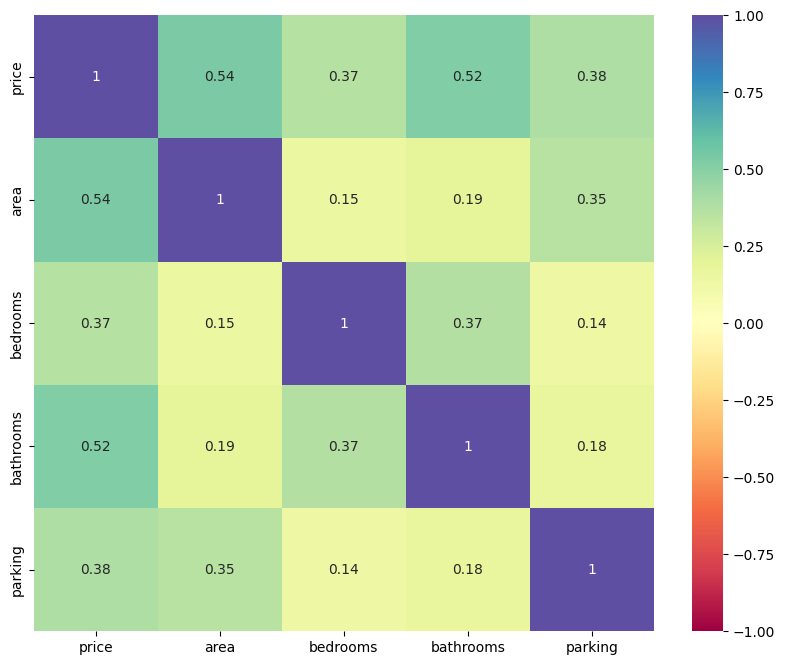

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), vmax=1, vmin=-1, center=0, cmap="Spectral", annot=True)

Nilai korelasi antar variabel X berkisar 0.14-0.37, sehingga dapat diasumsikan tidak terjadi multikolinieritas.

## Uji Linieritas

Uji Linearitas adalah sifat hubungan yang linear antara variabel, artinya setiap perubahan yang terjadi pada satu variabel akan diikuti perubahan dengan besaran yang sejajar pada variabel lainnya.

/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: divide by zero encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),
/usr/local/lib/python3.10/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


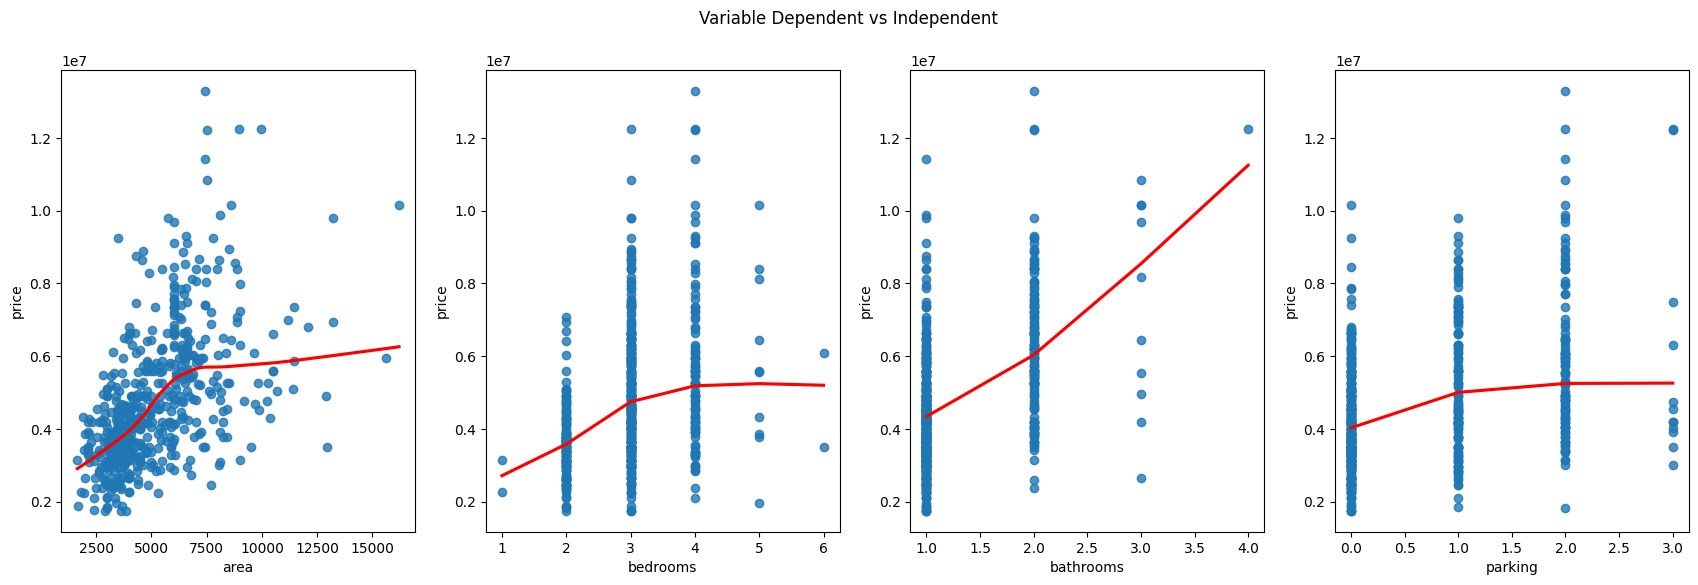

In [ ]:
# Keterkaitan x dengan y
fig, axes = plt.subplots(1, 4, figsize=(21, 6))
fig.suptitle('Variable Dependent vs Independent')

sns.regplot(x=data["area"], y=data["price"], lowess=True, line_kws={'color': 'red'}, ax=axes[0])
sns.regplot(x=data["bedrooms"], y=data["price"], lowess=True, line_kws={'color': 'red'}, ax=axes[1])
sns.regplot(x=data["bathrooms"], y=data["price"], lowess=True, line_kws={'color': 'red'}, ax=axes[2])
sns.regplot(x=data["parking"], y=data["price"], lowess=True, line_kws={'color': 'red'}, ax=axes[3])
plt.show()

## Membangun Model Regresi

Sebelum dilakukan pembentukan model, data terlebih dahulu dibagi menjadi data train dan data test. Data train untuk membangun model, dan data test untuk testing dari model yang terbentuk dengan pembagian 70% data train dan 30% data test.

In [ ]:
#Split data
X = data.drop("price", axis=1).values
y = data["price"].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

In [ ]:
# Masukkan intercepts secara manual
Input = sm.add_constant(X_train)

In [ ]:
# Modelling dengan statsmodels
SimpleModel = sm.OLS(y_train, Input, missing='drop')
results = SimpleModel.fit()

In [ ]:
# Print results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     95.19
Date:                Thu, 04 Apr 2024   Prob (F-statistic):           8.18e-56
Time:                        06:07:37   Log-Likelihood:                -5890.5
No. Observations:                 380   AIC:                         1.179e+04
Df Residuals:                     375   BIC:                         1.181e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.282e+05   3.25e+05     -1.008      0.3

Hasil Summary:

p-value X1,X2,X3,X4 adalah 0, kurang dari 5%. Artinya keempat variabel X berpengaruh signifikan terhadap harga rumah.

Model Regresi:

**price = -3.282e+05 + 338.9073 area + 4.544e+05 bedrooms + 1.412e+06 bathrooms + 3.774e+05 parking**

Keempat variabel X mampu menjelaskan sebesar 50.4%, sedangkan sisanya dijelaskan oleh variabel lain yg tidak ada di model.


## Uji residual

In [ ]:
# membuat list
list_columns = []

for i in data.columns:
  if i != "price":
    list_columns.append(i)

In [ ]:
# Membuat Prediksi Model
Input_test = sm.add_constant(X_test)
prediction_1 = results.predict(Input_test)

# Tampilkan dalam bentuk dataframe
df_statsmod = pd.DataFrame(X_test, columns=list_columns)
df_statsmod["actual_price"] = y_test
df_statsmod["prediction_price"] = prediction_1
df_statsmod.head()

,area,bedrooms,bathrooms,parking,actual_price,prediction_price
0,6350,3,2,0,6195000,6.010889e+06
1,3180,3,2,2,5215000,5.691433e+06
2,5850,3,1,1,2940000,4.806889e+06
3,2176,2,1,0,3850000,2.729938e+06
4,5200,3,1,0,5810000,4.209160e+06


### uji normalitas residual

<ipython-input-36-870117f0099c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual1, label="residual")


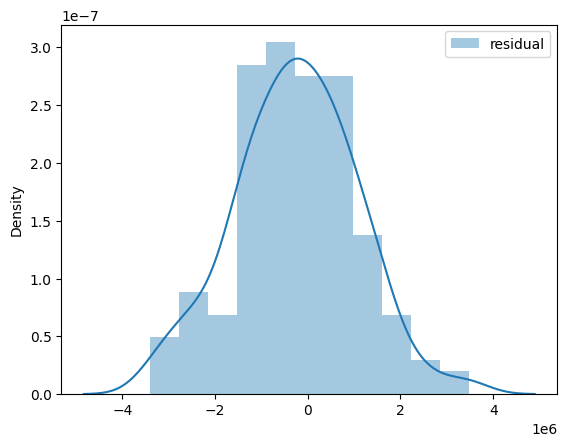

In [ ]:
# Melihat distribusi residual
residual1 = df_statsmod['actual_price'] - df_statsmod['prediction_price']
sns.distplot(residual1, label="residual")
plt.legend()
plt.show()

In [ ]:
# Uji Normalitas pada Residual
stat, p = shapiro(residual1)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Pengujian Hipotesis
alpha = 0.05
if p > alpha:
  print('Gagal Tolak H0, residual berdistribusi normal')
else:
  print('Tolak H0, residual tidak berdistribusi normal')

Statistics=0.994, p=0.735
Gagal Tolak H0, residual berdistribusi normal


In [ ]:
# Memasukkan residual kedalam dataframe
df_statsmod["residual"] = residual1
df_statsmod.head()

,area,bedrooms,bathrooms,parking,actual_price,prediction_price,residual
0,6350,3,2,0,6195000,6.010889e+06,1.841114e+05
1,3180,3,2,2,5215000,5.691433e+06,-4.764326e+05
2,5850,3,1,1,2940000,4.806889e+06,-1.866889e+06
3,2176,2,1,0,3850000,2.729938e+06,1.120062e+06
4,5200,3,1,0,5810000,4.209160e+06,1.600840e+06


### Homoskedastisitas Residual

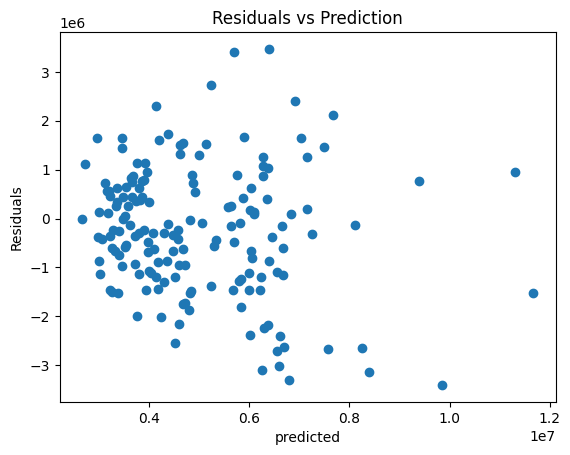

In [ ]:
asm_homosk = plt.scatter(df_statsmod['prediction_price'], df_statsmod["residual"])
plt.xlabel('predicted')
plt.ylabel('Residuals')
asm_homosk = sns.lineplot(color='red')
asm_homosk = plt.title('Residuals vs Prediction')

residual menyebar dan tidak membentuk pola

### Autokorelasi Residual

Nilai Durbin Watson pada summary 1.892, artinya tidak terjadi autokorelasi

## Evaluasi Model

In [ ]:
df_statsmod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              163 non-null    int64  
 1   bedrooms          163 non-null    int64  
 2   bathrooms         163 non-null    int64  
 3   parking           163 non-null    int64  
 4   actual_price      163 non-null    int64  
 5   prediction_price  163 non-null    float64
 6   residual          163 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 9.0 KB


In [ ]:
# merubah tipe data prediction dari float menjadi integer
df_statsmod['prediction_price']=df_statsmod['prediction_price'].astype(int)
df_statsmod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              163 non-null    int64  
 1   bedrooms          163 non-null    int64  
 2   bathrooms         163 non-null    int64  
 3   parking           163 non-null    int64  
 4   actual_price      163 non-null    int64  
 5   prediction_price  163 non-null    int64  
 6   residual          163 non-null    float64
dtypes: float64(1), int64(6)
memory usage: 9.0 KB


In [ ]:
df_statsmod

,area,bedrooms,bathrooms,parking,actual_price,prediction_price,residual
0,6350,3,2,0,6195000,6010888,1.841114e+05
1,3180,3,2,2,5215000,5691432,-4.764326e+05
2,5850,3,1,1,2940000,4806889,-1.866889e+06
3,2176,2,1,0,3850000,2729938,1.120062e+06
4,5200,3,1,0,5810000,4209159,1.600840e+06
...,...,...,...,...,...,...,...
158,7686,3,1,0,4970000,5051683,-8.168318e+04
159,6300,3,1,2,4900000,5336837,-4.368377e+05
160,6000,3,1,2,7962500,5235165,2.727334e+06
161,9800,4,2,2,5250000,8389364,-3.139364e+06


In [ ]:
# MSE
print('MSE :', metrics.mean_squared_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MSE : 1789000756440.6934


In [ ]:
# MAPE
print('MAPE :', metrics.mean_absolute_percentage_error(df_statsmod['actual_price'], df_statsmod['prediction_price']))

MAPE : 0.2618508297305041


Nilai MSE sangat besar, mungkin karena data tidak dilakukan scaling. Sehingga, disarankan untuk pengolahan menggunakan data ini, dilakukan scaling terlebih dahulu sebelum dibentuk model Regresi.

<ipython-input-52-86f023f6a3b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_statsmod['actual_price'], label="Actual")
<ipython-input-52-86f023f6a3b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_statsmod['prediction_price'], label="Predicted")


<function matplotlib.pyplot.show(close=None, block=None)>

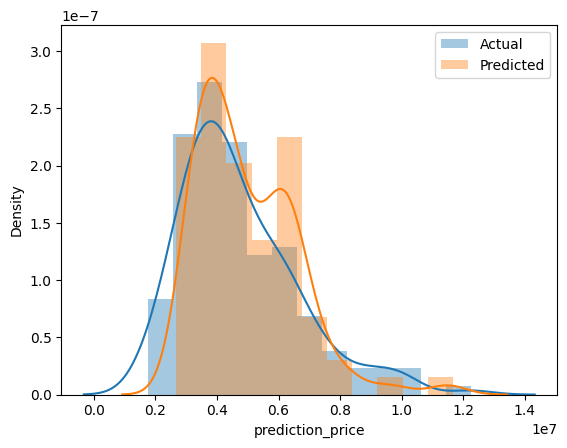

In [52]:
# Melihat perbedaan actual dan prediksi
sns.distplot(df_statsmod['actual_price'], label="Actual")
sns.distplot(df_statsmod['prediction_price'], label="Predicted")
plt.legend()
plt.show